# Project 3

In this project, you will perform a logistic regression on the admissions data we've been working with in projects 1 and 2.

In [180]:
%matplotlib inline
%pylab inline

import matplotlib.pyplot as plt
import pandas as pd
import statsmodels.api as sm
import pylab as pl
import numpy as np


Populating the interactive namespace from numpy and matplotlib


In [2]:
df_raw = pd.read_csv("../assets/admissions.csv")
df = df_raw.dropna() 
print df.head()

   admit    gre   gpa  prestige
0      0  380.0  3.61       3.0
1      1  660.0  3.67       3.0
2      1  800.0  4.00       1.0
3      1  640.0  3.19       4.0
4      0  520.0  2.93       4.0


## Part 1. Frequency Tables

#### 1. Let's create a frequency table of our variables

In [3]:
# frequency table for prestige and whether or not someone was admitted

print df['admit'].value_counts()
print df['prestige'].value_counts()

0    271
1    126
Name: admit, dtype: int64
2.0    148
3.0    121
4.0     67
1.0     61
Name: prestige, dtype: int64


## Part 2. Return of dummy variables

#### 2.1 Create class or dummy variables for prestige 

In [4]:
prestige_dummies =  pd.get_dummies(df['prestige'], prefix="prestige", drop_first=False)

In [5]:
print df.head()
print prestige_dummies.head()

   admit    gre   gpa  prestige
0      0  380.0  3.61       3.0
1      1  660.0  3.67       3.0
2      1  800.0  4.00       1.0
3      1  640.0  3.19       4.0
4      0  520.0  2.93       4.0
   prestige_1.0  prestige_2.0  prestige_3.0  prestige_4.0
0           0.0           0.0           1.0           0.0
1           0.0           0.0           1.0           0.0
2           1.0           0.0           0.0           0.0
3           0.0           0.0           0.0           1.0
4           0.0           0.0           0.0           1.0


#### 2.2 When modeling our class variables, how many do we need? 



Answer: 3 models as there can be 4 different types of values for prestige. 

## Part 3. Hand calculating odds ratios

Develop your intuition about expected outcomes by hand calculating odds ratios.

In [6]:
cols_to_keep = ['admit', 'gre', 'gpa']
handCalc = df[cols_to_keep].join(prestige_dummies.ix[:, 'prestige_1.0':])
print handCalc.head()

   admit    gre   gpa  prestige_1.0  prestige_2.0  prestige_3.0  prestige_4.0
0      0  380.0  3.61           0.0           0.0           1.0           0.0
1      1  660.0  3.67           0.0           0.0           1.0           0.0
2      1  800.0  4.00           1.0           0.0           0.0           0.0
3      1  640.0  3.19           0.0           0.0           0.0           1.0
4      0  520.0  2.93           0.0           0.0           0.0           1.0


In [7]:
handCalc['prestige_1.0'].head()

0    0.0
1    0.0
2    1.0
3    0.0
4    0.0
Name: prestige_1.0, dtype: float64

In [8]:
#crosstab prestige 1 admission 
# frequency table cutting prestige and whether or not someone was admitted
pd.crosstab(handCalc['prestige_1.0'], handCalc['admit'])

admit,0,1
prestige_1.0,,
0.0,243,93
1.0,28,33


#### 3.1 Use the cross tab above to calculate the odds of being admitted to grad school if you attended a #1 ranked college

In [42]:
float(33)/28

1.1785714285714286

#### 3.2 Now calculate the odds of admission if you did not attend a #1 ranked college

In [43]:
float(93)/243

0.38271604938271603

#### 3.3 Calculate the odds ratio

In [44]:
(float(33)/28)/(float(93)/243)

3.079493087557604

#### 3.4 Write this finding in a sentenance: 

Answer: Students who attened a number 1 ranked college, are 3.1 times more likely to be admitted than students who did not attened number 1 ranked college. 

#### 3.5 Print the cross tab for prestige_4

In [9]:
pd.crosstab(handCalc['prestige_4.0'], handCalc['admit'])

admit,0,1
prestige_4.0,,
0.0,216,114
1.0,55,12


#### 3.6 Calculate the OR 

In [46]:
(float(12)/55)/(float(114)/216)

0.4133971291866028

#### 3.7 Write this finding in a sentence

Answer: Students who attened a number 4 ranked college, are 0.4 times more likely to be admitted than students who did not attened number 4 ranked college. 

## Part 4. Analysis

In [10]:
# create a clean data frame for the regression
cols_to_keep = ['admit', 'gre', 'gpa']
data = df[cols_to_keep].join(prestige_dummies.ix[:, 'prestige_2.0':])
print data.head()

   admit    gre   gpa  prestige_2.0  prestige_3.0  prestige_4.0
0      0  380.0  3.61           0.0           1.0           0.0
1      1  660.0  3.67           0.0           1.0           0.0
2      1  800.0  4.00           0.0           0.0           0.0
3      1  640.0  3.19           0.0           0.0           1.0
4      0  520.0  2.93           0.0           0.0           1.0


We're going to add a constant term for our Logistic Regression. The statsmodels function we're going to be using requires that intercepts/constants are specified explicitly.

In [12]:
# manually add the intercept
data['intercept'] = 1.0

#### 4.1 Set the covariates to a variable called train_cols

In [22]:
train_cols = ['gre', 'gpa','prestige_2.0','prestige_3.0','prestige_4.0','intercept']

#### 4.2 Fit the model

In [26]:
## Load the data from Spector and Mazzeo (1980)
#spector_data = sm.datasets.spector.load()
#spector_data.exog = sm.add_constant(spector_data.exog)

# Logit Model
logit_mod = sm.Logit(data['admit'], data[train_cols])
logit_res = logit_mod.fit()

Optimization terminated successfully.
         Current function value: 0.573854
         Iterations 6


#### 4.3 Print the summary results

In [41]:
print logit_res.summary()

                           Logit Regression Results                           
Dep. Variable:                  admit   No. Observations:                  397
Model:                          Logit   Df Residuals:                      391
Method:                           MLE   Df Model:                            5
Date:                Sat, 16 Jul 2016   Pseudo R-squ.:                 0.08166
Time:                        13:04:58   Log-Likelihood:                -227.82
converged:                       True   LL-Null:                       -248.08
                                        LLR p-value:                 1.176e-07
                   coef    std err          z      P>|z|      [95.0% Conf. Int.]
--------------------------------------------------------------------------------
gre              0.0022      0.001      2.028      0.043      7.44e-05     0.004
gpa              0.7793      0.333      2.344      0.019         0.128     1.431
prestige_2.0    -0.6801      0.317     -2.14

#### 4.4 Calculate the odds ratios of the coeffiencents and their 95% CI intervals

hint 1: np.exp(X)

hint 2: conf['OR'] = params
        
           conf.columns = ['2.5%', '97.5%', 'OR']

In [86]:
pd.DataFrame({'Linear Regression Coefficients':logit_res.params, 'OR Coefficients': np.exp(logit_res.params)})

,Linear Regression Coefficients,OR Coefficients
gre,0.002218,1.002221
gpa,0.779337,2.180027
prestige_2.0,-0.680137,0.506548
prestige_3.0,-1.338677,0.262192
prestige_4.0,-1.553411,0.211525
intercept,-3.876854,0.020716


In [87]:
conf_int = logit_res.conf_int()
print conf_int
print np.exp(conf_int)

                     0         1
gre           0.000074  0.004362
gpa           0.127619  1.431056
prestige_2.0 -1.301337 -0.058936
prestige_3.0 -2.014579 -0.662776
prestige_4.0 -2.371624 -0.735197
intercept    -6.116077 -1.637631
                     0         1
gre           1.000074  1.004372
gpa           1.136120  4.183113
prestige_2.0  0.272168  0.942767
prestige_3.0  0.133377  0.515419
prestige_4.0  0.093329  0.479411
intercept     0.002207  0.194440


#### 4.5 Interpret the OR of Prestige_2

Answer: OR of prestige_2 is 0.51, indicating decreased odds of gettingg admitted for students who went to number 2 ranked colleges. 

#### 4.6 Interpret the OR of GPA

Answer: OR of GPA is 2.18, indicating increased odds of getting admitted for students who had higher GPA. 

## Part 5: Predicted probablities


As a way of evaluating our classifier, we're going to recreate the dataset with every logical combination of input values. This will allow us to see how the predicted probability of admission increases/decreases across different variables. First we're going to generate the combinations using a helper function called cartesian (above).

We're going to use np.linspace to create a range of values for "gre" and "gpa". This creates a range of linearly spaced values from a specified min and maximum value--in our case just the min/max observed values.

In [88]:
def cartesian(arrays, out=None):
    """
    Generate a cartesian product of input arrays.
    Parameters
    ----------
    arrays : list of array-like
        1-D arrays to form the cartesian product of.
    out : ndarray
        Array to place the cartesian product in.
    Returns
    -------
    out : ndarray
        2-D array of shape (M, len(arrays)) containing cartesian products
        formed of input arrays.
    Examples
    --------
    >>> cartesian(([1, 2, 3], [4, 5], [6, 7]))
    array([[1, 4, 6],
           [1, 4, 7],
           [1, 5, 6],
           [1, 5, 7],
           [2, 4, 6],
           [2, 4, 7],
           [2, 5, 6],
           [2, 5, 7],
           [3, 4, 6],
           [3, 4, 7],
           [3, 5, 6],
           [3, 5, 7]])
    """

    arrays = [np.asarray(x) for x in arrays]
    dtype = arrays[0].dtype

    n = np.prod([x.size for x in arrays])
    if out is None:
        out = np.zeros([n, len(arrays)], dtype=dtype)

    m = n / arrays[0].size
    out[:,0] = np.repeat(arrays[0], m)
    if arrays[1:]:
        cartesian(arrays[1:], out=out[0:m,1:])
        for j in xrange(1, arrays[0].size):
            out[j*m:(j+1)*m,1:] = out[0:m,1:]
    return out

In [108]:
# instead of generating all possible values of GRE and GPA, we're going
# to use an evenly spaced range of 10 values from the min to the max 
gres = np.linspace(data['gre'].min(), data['gre'].max(), 10)
print gres
# array([ 220.        ,  284.44444444,  348.88888889,  413.33333333,
#         477.77777778,  542.22222222,  606.66666667,  671.11111111,
#         735.55555556,  800.        ])
gpas = np.linspace(data['gpa'].min(), data['gpa'].max(), 10)
print gpas
# array([ 2.26      ,  2.45333333,  2.64666667,  2.84      ,  3.03333333,
#         3.22666667,  3.42      ,  3.61333333,  3.80666667,  4.        ])


# enumerate all possibilities
combos = pd.DataFrame(cartesian([gres, gpas, [1, 2, 3, 4], [1.]]))

[ 220.          284.44444444  348.88888889  413.33333333  477.77777778
  542.22222222  606.66666667  671.11111111  735.55555556  800.        ]
[ 2.26        2.45333333  2.64666667  2.84        3.03333333  3.22666667
  3.42        3.61333333  3.80666667  4.        ]


#### 5.1 Recreate the dummy variables

In [109]:
combos.head()

,0,1,2,3
0,220.0,2.260000,1.0,1.0
1,220.0,2.260000,2.0,1.0
2,220.0,2.260000,3.0,1.0
3,220.0,2.260000,4.0,1.0
4,220.0,2.453333,1.0,1.0


In [106]:
# recreate the dummy variables

# keep only what we need for making predictions
prestige_dummies2 =  pd.get_dummies(combos[2], prefix="prestige2", drop_first=False)

cols_to_keep = [0,1,3]
predict_data = combos[cols_to_keep].join(prestige_dummies2.ix[:, 'prestige2_2.0':])
print predict_data.head()

       0         1    3  prestige2_2.0  prestige2_3.0  prestige2_4.0
0  220.0  2.260000  1.0            0.0            0.0            0.0
1  220.0  2.260000  1.0            1.0            0.0            0.0
2  220.0  2.260000  1.0            0.0            1.0            0.0
3  220.0  2.260000  1.0            0.0            0.0            1.0
4  220.0  2.453333  1.0            0.0            0.0            0.0


#### 5.2 Make predictions on the enumerated dataset

In [148]:
X = predict_data[[0,1,3,'prestige2_2.0','prestige2_3.0','prestige2_4.0']]
ypred = logit_res.predict(X)

#### 5.3 Interpret findings for the last 4 observations

In [159]:
a = pd.DataFrame(X).tail(4)
b = pd.DataFrame(ypred).tail(4)
a.merge(b, left_index = True, right_index = True, how='outer')

,0_x,1,3,prestige2_2.0,prestige2_3.0,prestige2_4.0,0_y
396,800.0,4.0,1.0,0.0,0.0,0.0,0.985399
397,800.0,4.0,1.0,1.0,0.0,0.0,0.946509
398,800.0,4.0,1.0,0.0,1.0,0.0,0.934534
399,800.0,4.0,1.0,0.0,0.0,1.0,0.582995


Answer: given the same gre score of 800, gpa of 4.0, student who went to number 1 ranked college has a 98.54% of probability of getting admitted; student who went to number 2 ranked college has a 94.65% of probability of getting admitted; student who went to number 3 ranked college has a 93.45% of probability of getting admitted; student who went to number 4 ranked college has a 58.30% of probability of getting admitted; 

The probability of getting admitted decreased with the prestige of college that student went to. 

## Bonus

Plot the probability of being admitted into graduate school, stratified by GPA and GRE score.

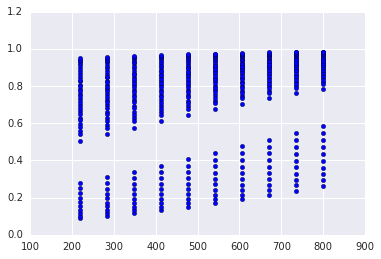

In [192]:
x = combos[[0]]
y = ypred
plt.scatter(x,y)

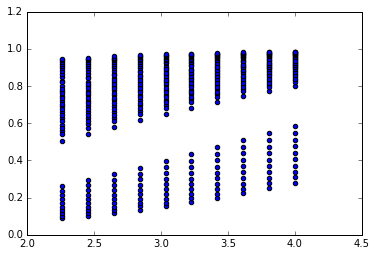

In [166]:
x = combos[[1]]
y = ypred
plt.scatter(x,y)